In [ ]:
#資料預處理

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [4]:
x_train_image.shape

(60000, 28, 28)

In [5]:
y_train_label.shape

(60000,)

In [6]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [7]:
#建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [11]:
model.add(Dense(units=150,  
                kernel_initializer='normal', 
                activation='relu'))

In [12]:
model.add(Dense(units=150,  
                kernel_initializer='normal', 
                activation='relu'))

In [13]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [14]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               38550     
_________________________________________________________________
dense_3 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1510      
Total params: 263,670
Trainable params: 263,670
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
#訓練模型

In [16]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [17]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 8s - loss: 0.5225 - accuracy: 0.8530 - val_loss: 0.1994 - val_accuracy: 0.9439
Epoch 2/20
 - 2s - loss: 0.1731 - accuracy: 0.9482 - val_loss: 0.1405 - val_accuracy: 0.9576
Epoch 3/20
 - 2s - loss: 0.1176 - accuracy: 0.9651 - val_loss: 0.1138 - val_accuracy: 0.9665
Epoch 4/20
 - 2s - loss: 0.0881 - accuracy: 0.9736 - val_loss: 0.1108 - val_accuracy: 0.9663
Epoch 5/20
 - 2s - loss: 0.0658 - accuracy: 0.9807 - val_loss: 0.0975 - val_accuracy: 0.9693
Epoch 6/20
 - 2s - loss: 0.0522 - accuracy: 0.9837 - val_loss: 0.0966 - val_accuracy: 0.9706
Epoch 7/20
 - 2s - loss: 0.0382 - accuracy: 0.9882 - val_loss: 0.0980 - val_accuracy: 0.9710
Epoch 8/20
 - 2s - loss: 0.0319 - accuracy: 0.9902 - val_loss: 0.0872 - val_accuracy: 0.9771
Epoch 9/20
 - 2s - loss: 0.0243 - accuracy: 0.9928 - val_loss: 0.0911 - val_accuracy: 0.9748
Epoch 10/20
 - 2s - loss: 0.0169 - accuracy: 0.9953 - val_loss: 0.0945 - val_accuracy: 0.9760
Epoch 11/20
 - 2s -

In [18]:
#以圖形顯示訓練過程

In [19]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

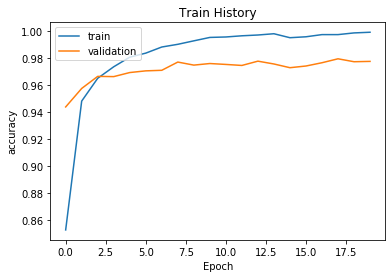

In [20]:
show_train_history(train_history,'accuracy','val_accuracy')

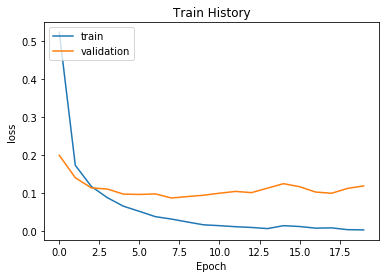

In [21]:
show_train_history(train_history,'loss','val_loss')

In [22]:
#評估模型準確率

In [23]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 54us/step

accuracy= 0.9764999747276306


In [24]:
#進行預測

In [25]:
prediction=model.predict_classes(x_Test)

In [26]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [27]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

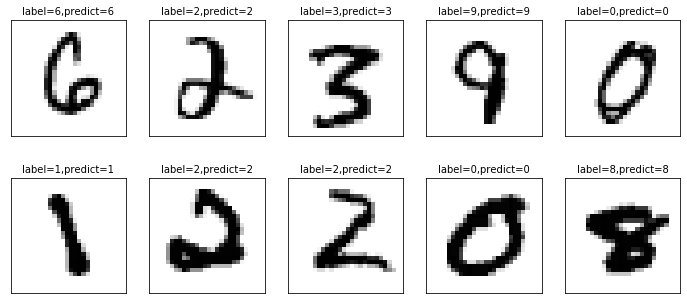

In [28]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=989)

In [29]:
#confusion matrix

In [30]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,2,1,0,2,1,2,0
1,0,1128,1,2,0,0,1,0,3,0
2,5,2,999,10,2,1,2,5,6,0
3,2,0,1,998,0,3,0,3,3,0
4,2,0,0,1,954,0,10,4,0,11
5,1,1,0,12,1,866,7,1,1,2
6,3,2,0,2,2,2,947,0,0,0
7,0,11,6,9,1,0,0,999,1,1
8,5,0,6,20,3,2,6,3,925,4


In [31]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [32]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2597,5,3
2930,5,3
3117,5,3
4360,5,3
5937,5,3


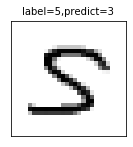

In [33]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1670,num=1)

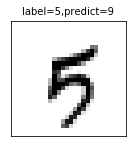

In [34]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)